In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [2]:
# 5.2.3 File to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read the city file and store in a pandas Dataframes
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride file and store in a pandas Dataframes
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# 5.2.4 inspect data
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get data types for each columns. make sure driver_count is a numerical data!
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
types = city_data_df['type'].unique()

In [9]:
# Get the number of data points for each type
for i in types:
    type_count = sum(city_data_df['type']==i)
    print(f"{i}:{type_count}")

Urban:66
Suburban:36
Rural:18


In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column. make sure fare and ride_id are numerical data type
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# merge two Dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])

In [14]:
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [15]:
# 5.3.2 Create the Urban, Suburban and Ruralcity DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
# Get the number of rides for each city.
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']
urban_ride_count.head(10)

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
East Kaylahaven    29
Erikaland          12
Grahamburgh        25
Huntermouth        24
Hurleymouth        28
Name: ride_id, dtype: int64

In [17]:
# 5.3.3 Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare = rural_cities_df.groupby('city').mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [18]:
# 5.3.4 Get the Average Number of Drivers for Each City Type
urban_drive_count = urban_cities_df.groupby('city').mean()['driver_count']
suburban_drive_count = suburban_cities_df.groupby('city').mean()['driver_count']
rural_drive_count = rural_cities_df.groupby('city').mean()['driver_count']
urban_drive_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

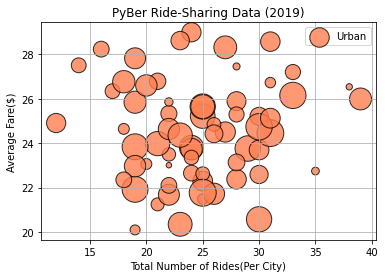

In [19]:
# 5.3.5 Create a scatter plot for each type of city
# Urban
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s = 10*urban_drive_count,
           c = 'coral', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid(True)

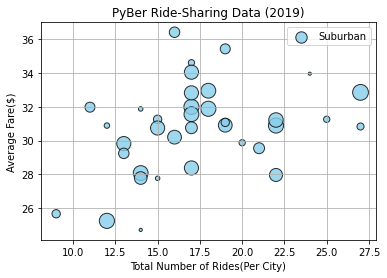

In [20]:
# Suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s = 10*suburban_drive_count,
           c = 'skyblue', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid(True)

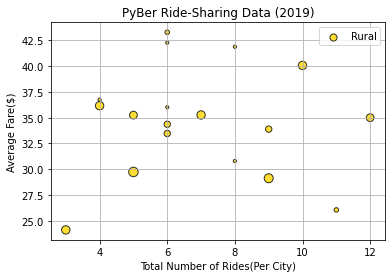

In [21]:
# Rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s = 10*rural_drive_count,
           c = 'gold', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid(True)

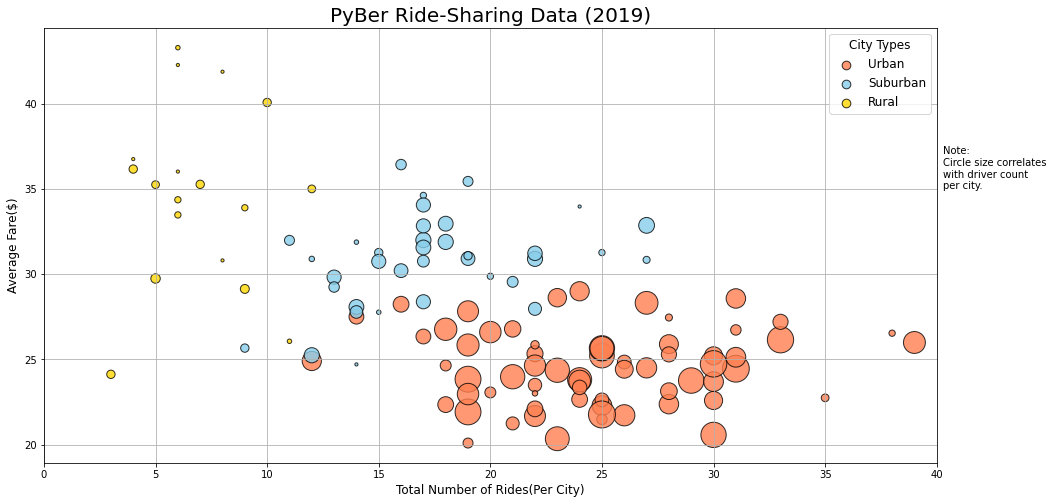

In [22]:
# 5.3.6 Combine

plt.figure(figsize=(16,8))
# Urban
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s = 10*urban_drive_count,
           c = 'coral', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Urban')
# Suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s = 10*suburban_drive_count,
           c = 'skyblue', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Suburban')
# Rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s = 10*rural_drive_count,
           c = 'gold', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Rural')


plt.title('PyBer Ride-Sharing Data (2019)',fontsize= 20)
plt.xlabel('Total Number of Rides(Per City)',fontsize= 12)
plt.ylabel('Average Fare($)',fontsize= 12)
plt.grid(True)
plt.xlim(0,40)

# Modify the legend
lgnd = plt.legend(fontsize='12', mode = 'Expanded', 
                   scatterpoints=1, loc='best', title='City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size. Make a note!
note = ('Note:\nCircle size correlates \nwith driver count\nper city.')
plt.text(40.3,35,note)

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [23]:
# 5.4.1 # Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [24]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [25]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [26]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [27]:
# Use Pandas to calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [28]:
# Use Pandas to calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [29]:
# Use Pandas to calculate the node of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [30]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [31]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [32]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [33]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [34]:
# 5.4.2 Summary Statistics for the Fare by City Type
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']
urban_fares.head(10)

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
5     9.52
6    43.25
7    35.98
8    35.09
9    42.81
Name: fare, dtype: float64

In [35]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [36]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [37]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(suburban_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $30.75.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [38]:
# 5.4.3 Summary Statistics for the Number of Drivers by City Type
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head(10)

0     5
1    72
2    57
3    34
4    46
5    10
6    44
7    21
8     4
9    33
Name: driver_count, dtype: int64

In [39]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean drivers count for urban trips is {mean_urban_drivers:.2f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers count for urban trips is {median_urban_drivers:.2f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers count for urban trips is {mode_urban_drivers}.")

The mean drivers count for urban trips is 36.68.
The median drivers count for urban trips is 37.00.
The mode drivers count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [40]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean drivers count for suburban trips is {mean_suburban_drivers:.2f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers count for suburban trips is {median_suburban_drivers:.2f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers count for suburban trips is {mode_suburban_drivers}.")

The mean drivers count for suburban trips is 13.71.
The median drivers count for suburban trips is 16.00.
The mode drivers count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [41]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean drivers count for rural trips is {mean_rural_drivers:.2f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers count for rural trips is {median_rural_drivers:.2f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers count for rural trips is {mode_rural_drivers}.")

The mean drivers count for rural trips is 4.30.
The median drivers count for rural trips is 4.00.
The mode drivers count for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


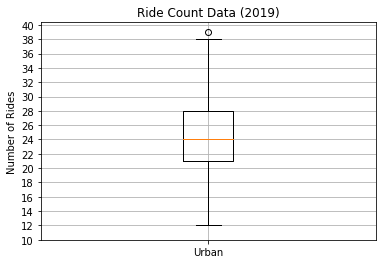

In [47]:
# 5.4.4 Create Box-and-Whisker Plots
# box-and-whisker plot for Ride Count Data
x_labels=['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

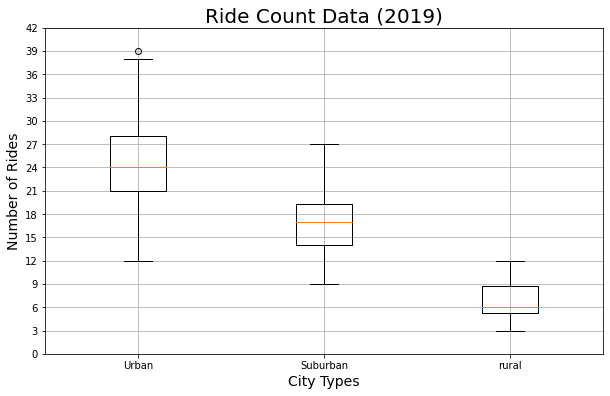

In [60]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=['Urban','Suburban','rural']
fig, ax = plt.subplots(figsize=(10, 6))
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
ax.boxplot(ride_count_data, labels=x_labels)

ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
# Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [67]:
# Get the city that matches 39 -- outlier.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


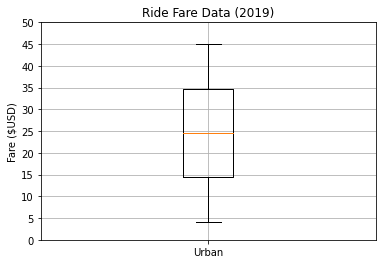

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [75]:
# Box-and-Whisker Plots for Urban Ride Fare Data
x_labels=['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

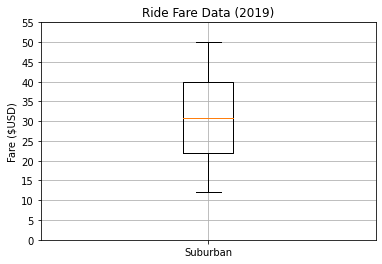

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [79]:
# Box-and-Whisker Plots for suburban Ride Fare Data
x_labels=['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,56,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

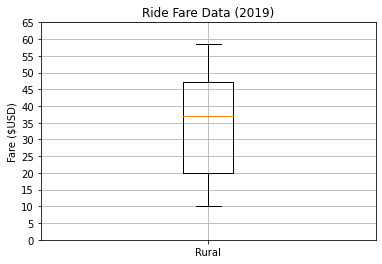

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [81]:
# Box-and-Whisker Plots for rural Ride Fare Data
x_labels=['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,66,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

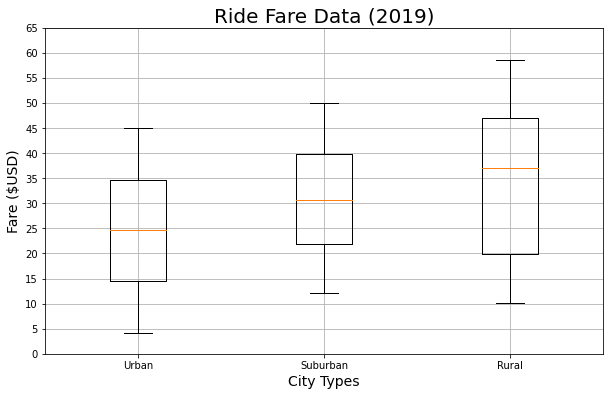

In [125]:
# combine three Box-and-Whisker Plots
x_labels = ['Urban', 'Suburban', 'Rural']
fig, ax = plt.subplots(figsize=(10,6))
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
ax.boxplot(ride_fare_data,labels= x_labels)
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0,66,step=5.0))
ax.grid()

plt.savefig('analysis/Fig3.png')
plt.show()

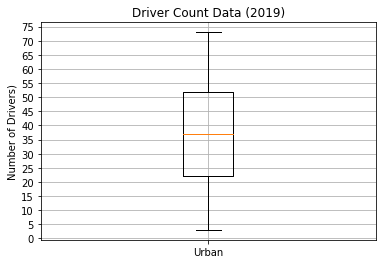

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [115]:
# Box-and-Whisker Plots for urban Driver Count Data
x_labels = ['Urban']
fig, ax =plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

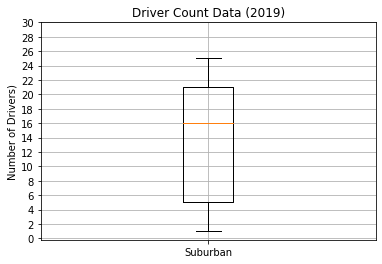

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [117]:
# Box-and-Whisker Plots for suburban Driver Count Data
x_labels = ['Suburban']
fig, ax =plt.subplots()
ax.boxplot(suburban_drivers, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 31, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

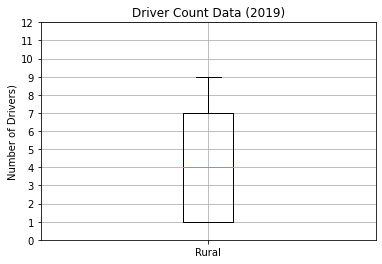

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [120]:
# Box-and-Whisker Plots for rural Driver Count Data
x_labels = ['Rural']
fig, ax =plt.subplots()
ax.boxplot(rural_drivers, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 13, step=1.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

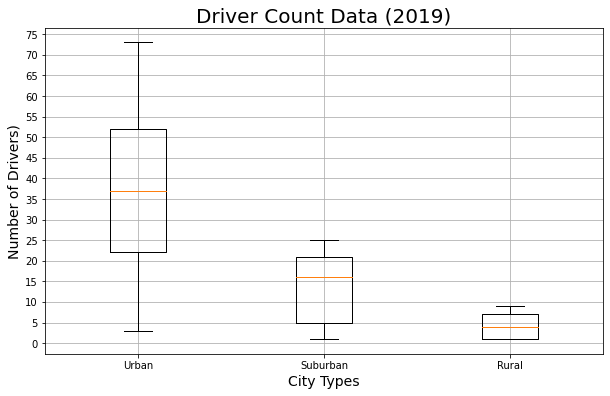

In [126]:
# combine three Box-and-Whisker Plots
x_labels = ['Urban', 'Suburban', 'Rural']
fig, ax = plt.subplots(figsize=(10,6))
ride_drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
ax.boxplot(ride_drivers_data,labels= x_labels)
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()

plt.savefig('analysis/Fig4.png')
plt.show()